Importing the Dependencies

In [21]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set()
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data Collection and Analysis

PIMA Diabetes Dataset

In [22]:
diabetes_data = pd.read_csv("D:\Downloads\diabetes.csv") 

In [23]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Basic EDA and statistical analysis

In [24]:
diabetes_data.shape

(768, 9)

In [25]:
# getting the statistical measures of the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1st Benchmark: Training the model with the raw data

In [26]:
# separating the data and labels
X = diabetes_data.drop(columns = 'Outcome', axis=1)
Y = diabetes_data['Outcome']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/5,shuffle=False)

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [30]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7833876221498371
Accuracy score of the test data :  0.7532467532467533


#### Pre-processing:

On these columns, a value of zero does not make sense and thus indicates missing value.
Following columns or variables have an invalid zero value:
Glucose
BloodPressure
SkinThickness
Insulin
BMI

In [31]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


print(diabetes_data_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

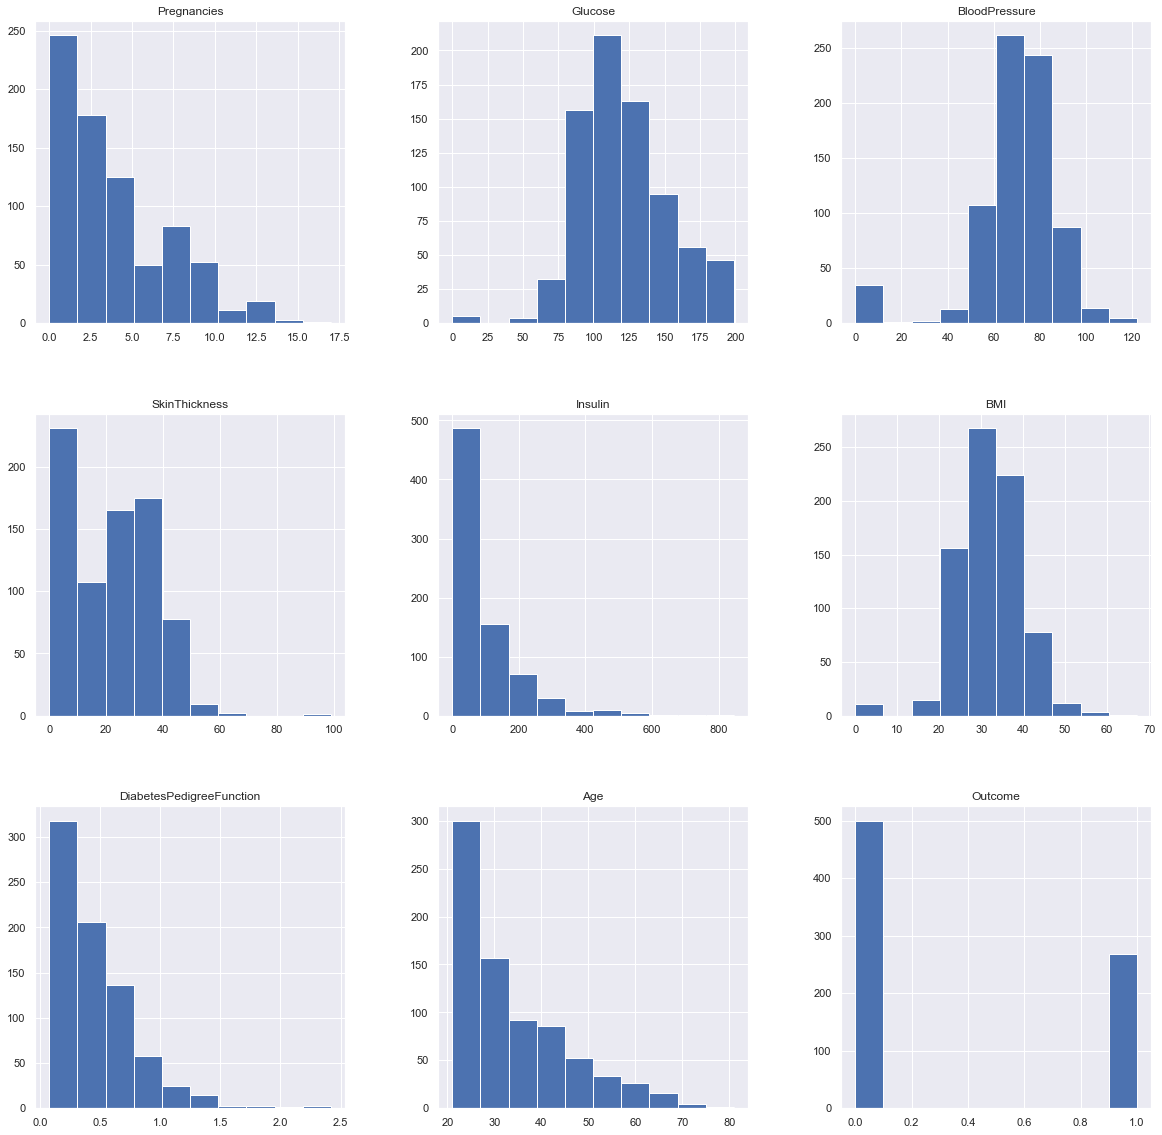

In [32]:
p = diabetes_data.hist(figsize = (20,20))

Replacing null values for columns considering their distribution

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
null_columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
impute_it = IterativeImputer()
impute_data = impute_it.fit_transform(diabetes_data_copy[null_columns])
diabetes_data_copy[null_columns] = impute_data

In [42]:

print(diabetes_data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


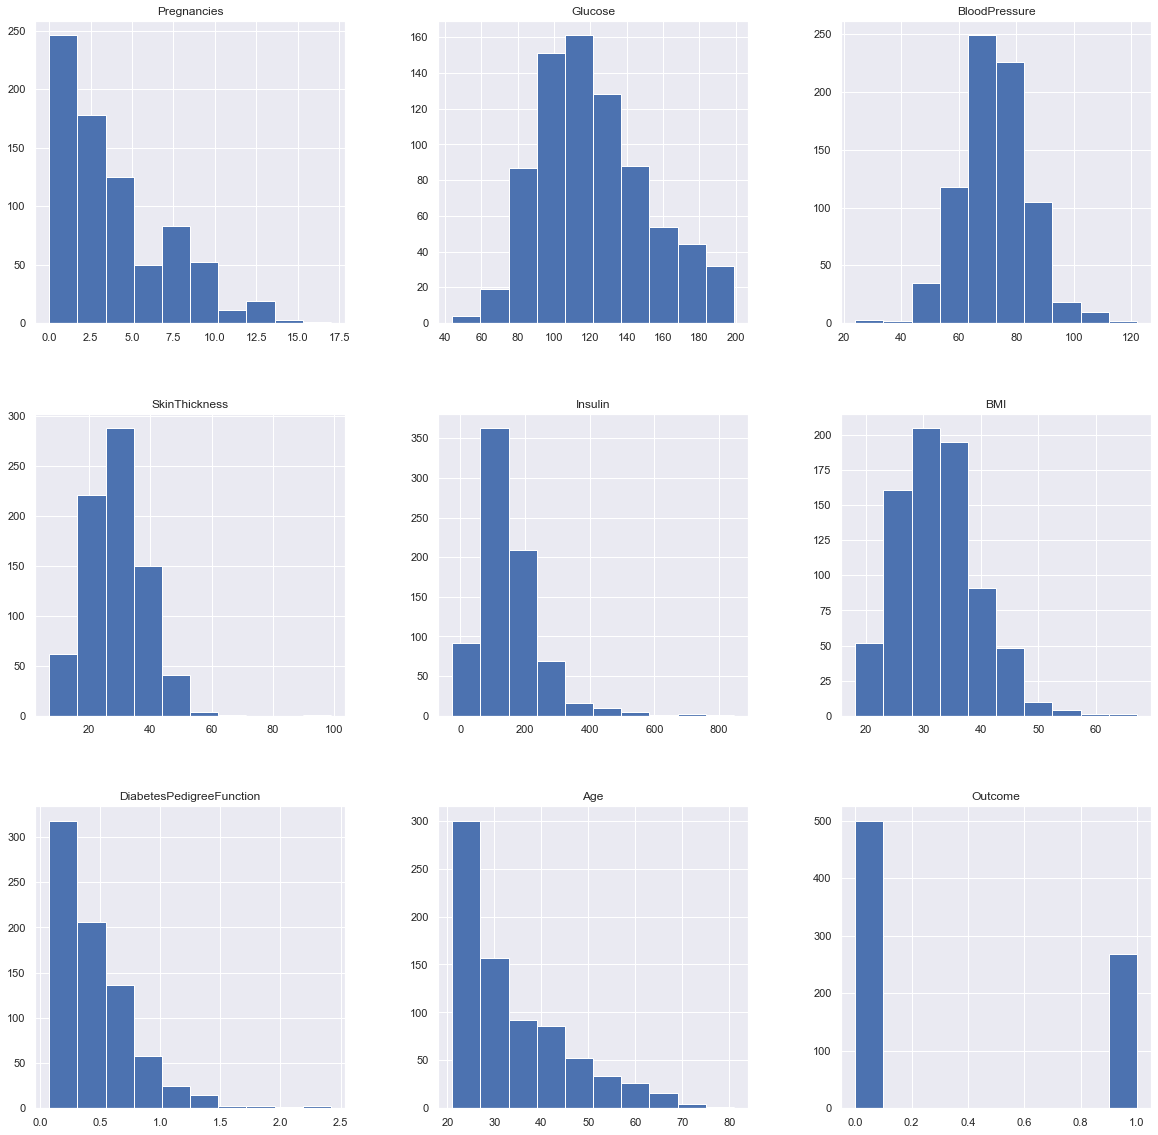

In [44]:
p = diabetes_data_copy.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


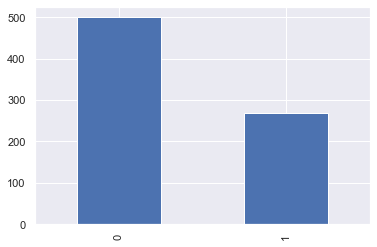

In [45]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

From the above graph we can say that the number of non-diabetics is almost twice the number of diabetic patients.

0 --> Non-Diabetic

1 --> Diabetic

In [46]:
diabetes_data_copy.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.623093,70.813670,26.835385,126.068301,30.860480,0.429734,31.190000
1,4.865672,142.215635,75.306249,32.389479,199.776682,35.396489,0.550500,37.067164


In [47]:
# separating the data and labels
X = diabetes_data_copy.drop(columns = 'Outcome', axis=1)
Y = diabetes_data_copy['Outcome']

In [48]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000  212.347446  33.6   
1              1     85.0           66.0      29.000000   66.407208  26.6   
2              8    183.0           64.0      21.486494  272.954432  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000  159.879349  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      26.461215  162.793546  30.1   
767            1     93.0           70.0      31.000000   88.189895  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [49]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(X)

StandardScaler()

In [52]:
standardized_data = scaler.transform(X)

In [53]:
print(standardized_data)

[[ 0.63994726  0.86571243 -0.03146359 ...  0.1682147   0.46849198
   1.4259954 ]
 [-0.84488505 -1.20392176 -0.5264427  ... -0.84982099 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0155092  -0.69143574 ... -1.3297521   0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02127365 -0.03146359 ... -0.90799446 -0.68519336
  -0.27575966]
 [-0.84488505  0.14298303 -1.02142181 ... -0.34080315 -0.37110101
   1.17073215]
 [-0.84488505 -0.94111107 -0.19645663 ... -0.29717305 -0.47378505
  -0.87137393]]


In [54]:
X = standardized_data
Y = diabetes_data_copy['Outcome']

In [55]:
print(X)
print(Y)

[[ 0.63994726  0.86571243 -0.03146359 ...  0.1682147   0.46849198
   1.4259954 ]
 [-0.84488505 -1.20392176 -0.5264427  ... -0.84982099 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0155092  -0.69143574 ... -1.3297521   0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02127365 -0.03146359 ... -0.90799446 -0.68519336
  -0.27575966]
 [-0.84488505  0.14298303 -1.02142181 ... -0.34080315 -0.37110101
   1.17073215]
 [-0.84488505 -0.94111107 -0.19645663 ... -0.29717305 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

Linear

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 1/5, shuffle=False)

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [67]:
print(Y_train.value_counts())

0    401
1    213
Name: Outcome, dtype: int64


Training the Model - Linear SVM, before hyperparameter optimization

In [68]:
classifier = svm.SVC(kernel='linear')

In [69]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [70]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7801302931596091
Accuracy score of the test data :  0.7467532467532467


SVM - Hyperparameter optimization

In [71]:
from sklearn.model_selection import GridSearchCV
  
#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['liner','rbf','poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=liner;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=liner;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=liner;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=liner;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=liner;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.740 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [35]:
#print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
#print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        99
           1       0.72      0.47      0.57        55

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154



#### Model 3 - KNN classification

In [32]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))


In [33]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [34]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.87012987012987 % and k = [28]


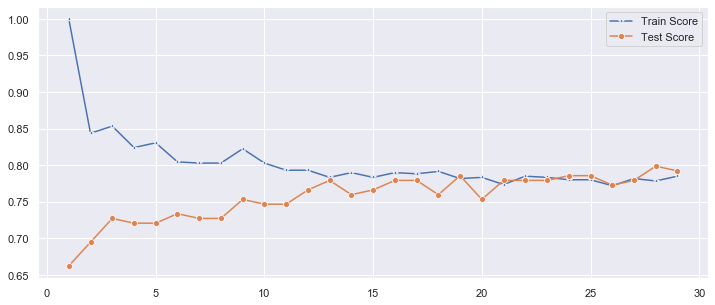

In [35]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

In [36]:
knn = KNeighborsClassifier(n_neighbors = 28,metric='euclidean',p=2)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.7987012987012987

In [ ]:
y_pred=knn.predict(X_test)

mat = confusion_matrix(Y_test, y_pred,labels=[1,0])
mat

#### Feature Selection

In [38]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

print(X.shape)
X_new = SelectKBest(f_classif, k=2).fit_transform(X_train, Y_train)
X_new
X_test_new = SelectKBest(f_classif, k=2).fit_transform(X_test, Y_test)

(768, 8)


In [39]:
knn1 = KNeighborsClassifier(n_neighbors = 28)

knn1.fit(X_new,Y_train)
knn1.score(X_test_new,Y_test)

0.7662337662337663

#### Random Forest Algorithm

In [19]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc().fit(X_train, Y_train)
y_pred = clf.predict(X_test)

In [20]:
print(clf.score(X_test,Y_test))
mat = confusion_matrix(Y_test, y_pred)
mat

0.7207792207792207


array([[80, 19],
       [24, 31]], dtype=int64)

In [ ]:
from sklearn.model_selection import GridSearchCV
  
#defining parameter range
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]} 
  
grid = GridSearchCV(rfc(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
grid.fit(X_train, Y_train)

In [69]:
#print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=40, n_estimators=400)


In [70]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
#print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



kfold cross validation

In [48]:
model = KNeighborsClassifier(n_neighbors = 28,metric='euclidean',p=2)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)



cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', verbose=10)



print("--------",cv_results.mean(), cv_results.std())

[CV] START .....................................................................
[CV] END ................................ score: (test=0.699) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.732) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.797) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.772) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.730) total time=   0.0s
-------- 0.7459016393442622 0.034460863344425975


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [21]:

import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix



In [22]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:





    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes])





    for train_ndx, test_ndx in kfold.split(X):





        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]





        actual_classes = np.append(actual_classes, test_y)





        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))





        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)





    return actual_classes, predicted_classes, predicted_proba

In [23]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):
    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    plt.figure(figsize=(12.6,8))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Actual'); plt.ylabel('Predicted'); plt.title('Confusion Matrix')
    plt.show()

In [24]:
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X, Y)
plot_confusion_matrix(predicted_classes,actual_classes, [0, 1])

NameError: name 'model' is not defined

In [25]:
model = RandomForestClassifier()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)



cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', verbose=10)



print("--------",cv_results.mean(), cv_results.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.691) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.764) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.780) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.772) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] END ................................ score: (test=0.762) total time=   0.3s
-------- 0.7540850326536053 0.03216774542276068


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


As the accuracy score of the model decreases we will proceed with all the features in the data for our prediction.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [65]:
#input_data = (5,166,72,19,175,25.8,0.587,51)

input_data = []

print("Enter number of pregnancies had:")
input_data.append(input())

print("Enter Glucose Level:")
input_data.append(input())

print("Enter Blood Pressure Level:")
input_data.append(input())

print("Enter Skin Thickness of the Patient:")
input_data.append(input())

print("Enter Insulin Level:")
input_data.append(input())

print("Enter BMI of the Patient:")
input_data.append(input())

print("Enter Diabetese Pedegree Function:")
input_data.append(input())

print("Enter Patient Age:")
input_data.append(input())

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Enter number of pregnancies had:
1
Enter Glucose Level:
1
Enter Blood Pressure Level:
1
Enter Skin Thickness of the Patient:
1
Enter Insulin Level:
1
Enter BMI of the Patient:
1
Enter Diabetese Pedegree Function:
1
Enter Patient Age:
1
['1' '1' '1' '1' '1' '1' '1' '1']
[0]
The person is not diabetic


In [26]:
from tkinter import *
from tkinter import ttk
import time

In [ ]:
class MyWindow:



           
    def __init__(self, win):
        self.lbl0=Label(win, text="Enter your patient's details")
        self.lbl1=Label(win, text="Number of pregnancies")
        self.lbl2=Label(win, text='Glucose Level')
        self.lbl3=Label(win, text='Blood Pressure Level')
        self.lbl4=Label(win, text='Skin Thickness of the Patient')
        self.lbl5=Label(win, text='Insulin Level')
        self.lbl6=Label(win, text='BMI of the Patient')
        self.lbl7=Label(win, text='Diabetese Pedegree Function')
        self.lbl8=Label(win, text='Patient Age')
        self.lbl9=Label(win, text='Prediction')
        self.t1=Entry(bd=3)
        self.t2=Entry()
        self.t3=Entry()
        self.t4=Entry()
        self.t5=Entry()
        self.t6=Entry()
        self.t7=Entry()
        self.t8=Entry()
        self.t9=Entry()
        self.btn1 = Button(win, text='Predict')
        self.lbl0.place(x=225, y=15)
        self.lbl1.place(x=100, y=50)
        self.t1.place(x=400, y=50)
        self.lbl2.place(x=100, y=100)
        self.t2.place(x=400, y=100)
        self.lbl3.place(x=100, y=150)
        self.t3.place(x=400, y=150)
        self.lbl4.place(x=100, y=200)
        self.t4.place(x=400, y=200)
        self.lbl5.place(x=100, y=250)
        self.t5.place(x=400, y=250)
        self.lbl6.place(x=100, y=300)
        self.t6.place(x=400, y=300)
        self.lbl7.place(x=100, y=350)
        self.t7.place(x=400, y=350)
        self.lbl8.place(x=100, y=400)
        self.t8.place(x=400, y=400)
        self.b1=Button(win, text='Predict', command=self.pred)
        self.b1.place(x=100, y=450)
        self.lbl9.place(x=100, y=500)
        self.t9.place(x=200, y=500)



    def pred(self):
            self.t9.delete(0, 'end')
            input_data = []
            input_data.append(int(self.t1.get()))
            input_data.append(int(self.t2.get()))
            input_data.append(int(self.t3.get()))
            input_data.append(int(self.t4.get()))
            input_data.append(int(self.t5.get()))
            input_data.append(float(self.t6.get()))
            input_data.append(float(self.t7.get()))
            input_data.append(int(self.t8.get()))
            input_data_as_numpy_array = np.asarray(input_data)
            input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
            std_data = scaler.transform(input_data_reshaped)
            prediction = model_.predict(std_data)
            if (prediction[0] == 0):
                result='The person is not diabetic'
            else:
                result='The person is diabetic'
            self.t9.insert(END, result)
            
window=Tk()
mywin=MyWindow(window)
window.title('Diabetes Prediction System')
window.geometry("800x600+10+10")
window['background']='#856ff8'
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\apoor\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-27-5257af661432>", line 65, in pred
    prediction = model_.predict(std_data)
NameError: name 'model_' is not defined
